do you have trouble finding skincare products that work for you?

run the cells below to get new product recommendations similar to what you already love.

In [1]:
#load all the important stuff
import difflib
import numpy as np
import pandas as pd
from difflib import SequenceMatcher

from IPython.display import Image
import requests
import IPython.display as Disp

#load product database
product_file='ulta.csv'
product_db=pd.read_csv(product_file)

#combine brand + product name
brand_plus_name=[str(product_db['brand'].loc[i])+' '+str(product_db['name'].loc[i]) for i in range(0,len(product_db))]
product_db['name']=brand_plus_name

please enter a product name below:
vitamin c serum

product not found, did you mean:
     mad hippie vitamin c serum
     hanskin vitamin c glow serum
     mad hippie vitamin a serum

     strivectin travel size super-c retinol brighten & correct vitamin c serum
     cerave skin renewing vitamin c serum
     mario badescu vitamin c serum
     mad hippie vitamin c serum
     strivectin super-c retinol brighten & correct vitamin c serum

please re-enter your query below:
cerave skin renewing vitamin c serum

product found!

your chosen product: cerave skin renewing vitamin c serum (Price$24.99)

ingredients:
Aqua/Water/Eau, Ascorbic Acid, Glycerin, Dimethicone, Cetearyl Ethylhexanoate, Alcohol Denat., Sodium Hydroxide, Ammonium Polyacryloyldimethyl Taurate, Panthenol, Ceramide Np, Ceramide Ap, Ceramide Eop, Carbomer, Cetearyl Alcohol, Behentrimonium Methosulfate, Sodium Hyaluronate, Sodium Lauroyl Lactylate, Cholesterol, Phenoxyethanol, Tocopheryl Acetate, Disodium Edta, Isopropyl Myrist

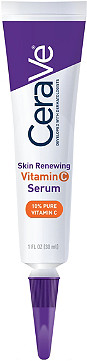

In [2]:
#user inputs product name
print 'please enter a product name below:'
nameA=raw_input()
nameA=nameA.lower()
print ''

name_list=[str(product_db['name'].loc[i]).lower() for i in range(0,len(product_db))]

#if product not found, suggest similar product names, ask user to re-enter input
if(nameA not in name_list):
    
    #loop until a valid name is entered
    match=False
    while(match==False):
        
        #suggestions for similar product names
        possible_matches=difflib.get_close_matches(nameA,name_list)
        contains=[name_list[i] for i in range(0,len(name_list)) if nameA in name_list[i]]
        
        if((len(possible_matches)>0) or (len(contains)>0)):
            print 'product not found, did you mean:'.format()
            for name in possible_matches:
                print '     {}'.format(name)
            print ''
            for name in contains:
                print '     {}'.format(name)
        else:
            print 'sorry, no matching products found'
            
        print ''
        print 'please re-enter your query below:'
        nameA=raw_input()
        if(nameA in name_list):
            print '\nproduct found!\n'
            match=True
            
name_list=np.asarray(name_list)
indexA = np.where(name_list==nameA)[0][0]
            
print 'your chosen product: {} ({})\n'.format(nameA,product_db['price'].loc[indexA])
print 'ingredients:'
print product_db['ingredients'].loc[indexA]

print ''
url=product_db['image-src'].loc[indexA]
Disp.Image(requests.get(url).content,width=100,height=100)

In [4]:
#find 3 most similar products, based on ingredients

#format ingredients list
try:
    listA = product_db['ingredients'].loc[indexA].split(', ')
except:
    listA=['invalidA']
    
listA=[ingr.lower() for ingr in listA]

num_shared=[]

print 'searching for products similar to {}...\n'.format(nameA)

for i in range(0,len(product_db)):
    nameB=name_list[i]
    
    #format ingredients list
    try:
        listB = product_db['ingredients'].loc[i].split(', ')
    except:
        listB=['invalidB']
        
    listB=[ingr.lower() for ingr in listB]
        
    shared=(set(listA) & set(listB))
    if(nameA!=nameB):
        num_shared.append(len(shared))
    else:
        num_shared.append(0)

num_shared=np.asarray(num_shared)

#if matches exist
if(sum(num_shared)>0):
    match_indices=[]
    shared_ingredients=[]
    for i in [0,1,2]: #get top 3 matches
        if(sum(num_shared)>0):
            #find (next) max value
            max_index=np.where(num_shared==max(num_shared))[0][0]
            match_indices.append(max_index)
            shared_ingredients.append(max(num_shared))
            #remove max value
            num_shared=np.delete(num_shared,max_index)
    
    print 'top match(es):\n'
    for i in range(0,len(match_indices)):
        index=match_indices[i]
        print '{} ({})'.format(name_list[index],product_db['price'].loc[index])
        print '{} shared ingredients\n'.format(shared_ingredients[i])
else:
    print 'no matches found'

searching for products similar to cerave skin renewing vitamin c serum...

top match(es):

cerave hydrating hyaluronic acid serum (Price$18.99)
24 shared ingredients

murad retinol youth renewal eye serum (Price$85.00)
19 shared ingredients

nuface trinity facial toning kit + twr attachment set (Price$429.00)
17 shared ingredients

